K-means Clustering analysis of cleaned data sets

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
sns.set_style('darkgrid')

In [2]:
# import data
df = pd.read_csv('../Data/ICTO_Datasets/cleaned_ICTO_Datasets.csv')
df.head()

,Unnamed: 0,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country
0,7930,5485,3/1/2013,12/31/2013,Married,2,Erlanger,KY,41018,United States of America
1,2140,4454,11/1/2011,4/30/2012,Married,2,Spanish Fort,AL,36527,United States of America
2,8921,767,1/1/2013,12/31/2013,Single,1,Lexington,KY,40517,United States of America
3,1713,6368,7/1/2015,2/29/2016,Married,2,Manheim,PA,17545,United States of America
4,91,1919,8/1/2011,7/31/2012,Divorced,1,Jacksonville,FL,32258-5434,United States of America


In [3]:
df_2018 = pd.read_csv('../Data/ICTO_Datasets/cleaned_ICTO_Giving_2018-2019.csv')
df_2018

,Unnamed: 0,FundGroup,GiftDate,GiftAmt
0,1414382,Member,4/15/2019,100.0
1,1306188,Member,3/10/2019,50.0
2,513809,Member,6/20/2018,40.0
3,1258612,Member,2/21/2019,185.0
4,497049,Member,6/15/2018,100.0
...,...,...,...,...
798612,784008,Member,9/20/2018,100.0
798613,667763,Member,8/10/2018,125.0
798614,1567624,Member,6/10/2019,1190.0
798615,465355,Member,6/7/2018,300.0


In [4]:
df.shape

(8900, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8900 entries, 0 to 8899
Data columns (total 10 columns):
Unnamed: 0                     8900 non-null int64
MinistryMonthlyBudgetAmount    8900 non-null int64
StartDate                      8900 non-null object
EndDate                        8900 non-null object
Marital_Status                 8900 non-null object
Number_of_Household_Members    8900 non-null int64
City                           8900 non-null object
State                          8900 non-null object
PostalCode                     8900 non-null object
Country                        8900 non-null object
dtypes: int64(3), object(7)
memory usage: 695.4+ KB


In [6]:
df.describe()

,Unnamed: 0,MinistryMonthlyBudgetAmount,Number_of_Household_Members
count,8900.000000,8900.000000,8900.000000
mean,11059.464382,4661.546067,1.857753
std,6517.936876,1805.624232,0.355383
min,0.000000,44.000000,1.000000
25%,5427.500000,3326.000000,2.000000
50%,11013.500000,4598.000000,2.000000
75%,16622.000000,5915.250000,2.000000
max,22525.000000,15136.000000,3.000000


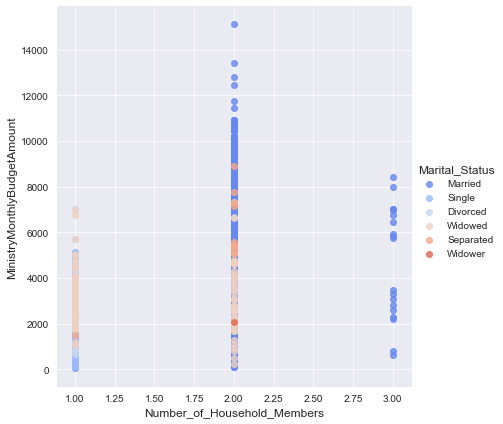

In [7]:
sns.lmplot('Number_of_Household_Members', 'MinistryMonthlyBudgetAmount', data=df, hue='Marital_Status',
          palette='coolwarm', height=6, aspect=1, fit_reg=False)

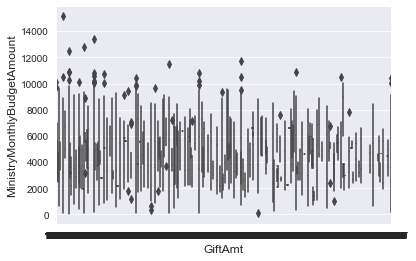

In [8]:
sns.boxplot(df_2018['GiftAmt'], df['MinistryMonthlyBudgetAmount'])

In [9]:
# Turn the categorical data of the postal codes into numerical data by assigning a new unqiue
# numerical value to each one of the postal codes 
# df['PostalCode'].value_counts()
geo_unique = df['PostalCode'].unique()
geo = df['PostalCode']
print(geo_unique.shape)
print(geo.shape)

(1559,)
(8900,)


In [10]:
geo_mapping={}

index = 0
for code in geo_unique:
    geo_mapping.update({code : index})
    index += 1
# geo_mapping

In [11]:
df['GeoSpatial'] = 'none'
df[['GeoSpatial','PostalCode']].head()

,GeoSpatial,PostalCode
0,none,41018
1,none,36527
2,none,40517
3,none,17545
4,none,32258-5434


In [12]:
# Feature engineering create a new feature in the data set for the postal codes
# df['GeoSpatial'] = df['PostalCode'].map(geo_mapping, na_action='ignore')
df['GeoSpatial'] = df['PostalCode'].replace(geo_mapping)
df[['GeoSpatial', 'PostalCode']].head()

,GeoSpatial,PostalCode
0,0,41018
1,1,36527
2,2,40517
3,3,17545
4,4,32258-5434


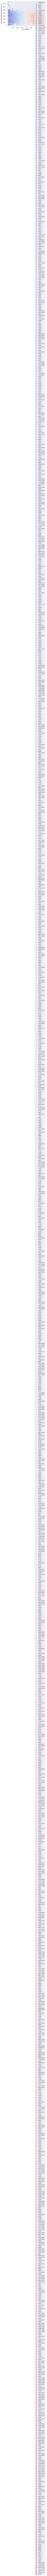

In [13]:
sns.scatterplot(x=df['GeoSpatial'], y=df['MinistryMonthlyBudgetAmount'], data=df,
                hue='PostalCode', palette='coolwarm')

In [14]:
# Next import k means and create clusters
from sklearn.cluster import KMeans

In [15]:
# Create instance with number of clusters equal to number of unqiue postal codes
kmeans_unique = KMeans(n_clusters=1559)
kmeans_unique

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1559, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# Fit the model to all data
# df_geo = df[['GeoSpatial', 'PostalCode']]
# kmeans.fit(df[['GeoSpatial', 'PostalCode']])
kmeans_unique.fit(df[['GeoSpatial', 'MinistryMonthlyBudgetAmount']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1559, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
y_kmeans = kmeans_unique.predict(df[['GeoSpatial', 'MinistryMonthlyBudgetAmount']])
y_kmeans

array([1455,  160,  400, ..., 1059, 1353, 1023])

In [18]:
df['GeoSpatial']

0         0
1         1
2         2
3         3
4         4
       ... 
8895     45
8896    170
8897     47
8898    718
8899     45
Name: GeoSpatial, Length: 8900, dtype: int64

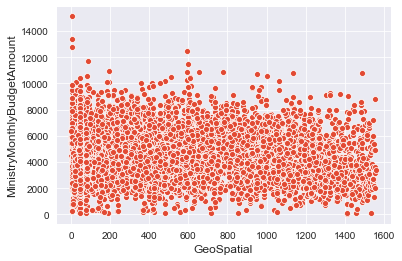

In [19]:
sns.scatterplot(x=df['GeoSpatial'], y=df['MinistryMonthlyBudgetAmount'])

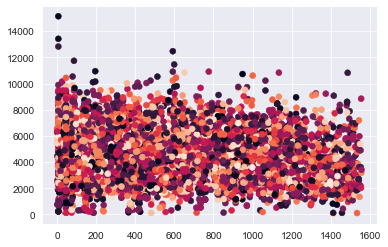

In [20]:
plt.scatter(df['GeoSpatial'], df['MinistryMonthlyBudgetAmount'], c = y_kmeans)

In [21]:
centers = kmeans_unique.cluster_centers_
centers

array([[  45.57142857, 7213.        ],
       [ 192.42857143, 3726.71428571],
       [ 283.23076923, 5168.92307692],
       ...,
       [1398.33333333, 2511.66666667],
       [ 358.        , 3193.25      ],
       [1029.        , 3579.        ]])

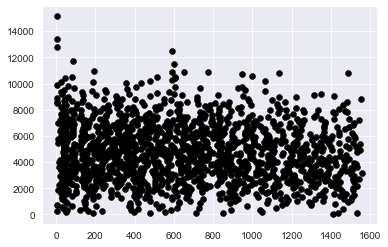

In [22]:
plt.scatter(centers[:,0], centers[:,1], c='black')

In [23]:
# Evaluate the clusters 
# Try Creating a confusion matrix and classification report to see how well the Kmeans clustering 
# worked without being given any labels.